In [1]:
import pandas as pd

df = pd.read_csv('red_30_tech_us_sales_cleaned.csv')

sum_sales_quantity = df.groupby('empid')['quantity'].sum()
print(sum_sales_quantity)


empid
900010405    1473
900010430    1508
900010813     722
900010836    1391
900010875    1213
900011056     887
900011189    1339
900011678    1108
900012180     913
900012258     628
900012260     402
900012297     500
900012326    1298
900012483    1437
900012723    2497
900012972    1800
900013387    1642
900013587     618
900013598     953
900013626    2584
900014032    1068
900014598    2311
900014980    1362
900015082    1887
900015476     738
900015673     904
900015938    2664
900016088    1431
900016297    1284
900016392     613
900016416    2050
900016602    1238
900017044     769
900017930     459
900018190    2223
900018460    1652
900018661    1941
900018689    1298
900018996    1205
900019250     392
900019311     704
900019833     872
900019884     628
900019978     665
Name: quantity, dtype: int64


In [2]:
mean_sales_quantity = df.groupby('empid')['quantity'].mean()
min_sales_quantity = df.groupby('empid')['quantity'].min()
max_sales_quantity = df.groupby('empid')['quantity'].max()

In [3]:
print(mean_sales_quantity)

empid
900010405     9.149068
900010430    11.689922
900010813    13.622642
900010836    10.303704
900010875    13.184783
900011056    14.540984
900011189    20.921875
900011678    11.787234
900012180     9.712766
900012258    10.129032
900012260     7.584906
900012297     8.928571
900012326     9.544118
900012483    13.817308
900012723    10.951754
900012972    10.404624
900013387    11.246575
900013587    10.131148
900013598    10.707865
900013626    10.949153
900014032    12.714286
900014598    15.006494
900014980    11.741379
900015082    10.970930
900015476    10.394366
900015673    13.492537
900015938    13.253731
900016088    11.729508
900016297     9.372263
900016392    10.754386
900016416    11.988304
900016602     9.378788
900017044    11.144928
900017930     8.052632
900018190    11.059701
900018460    12.906250
900018661    10.664835
900018689     8.320513
900018996    12.050000
900019250    10.051282
900019311     7.257732
900019833     8.149533
900019884     9.968254
90001

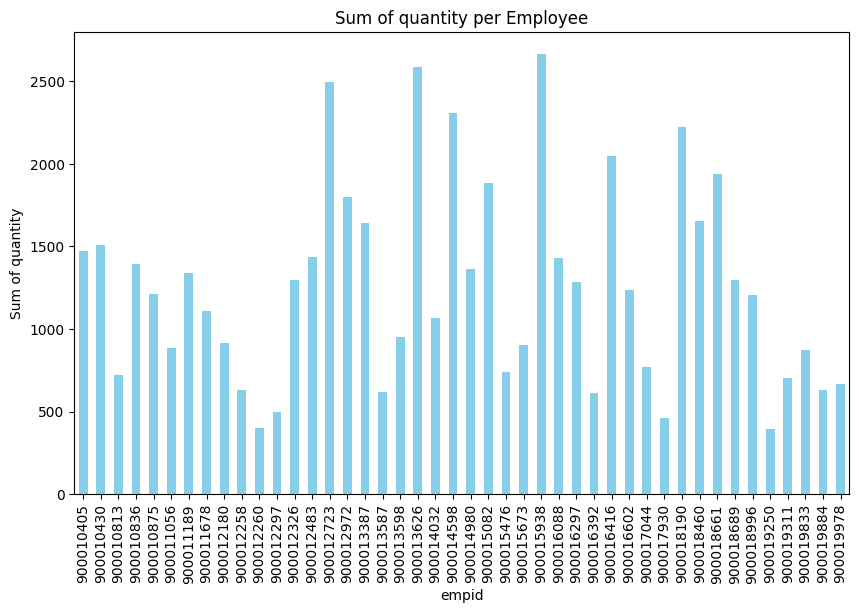

In [4]:
import matplotlib.pyplot as plt

sum_sales_quantity.plot(kind='bar', figsize=(10, 6),color='skyblue')

plt.xlabel('empid')
plt.ylabel('Sum of quantity')
plt.title('Sum of quantity per Employee')

plt.show()

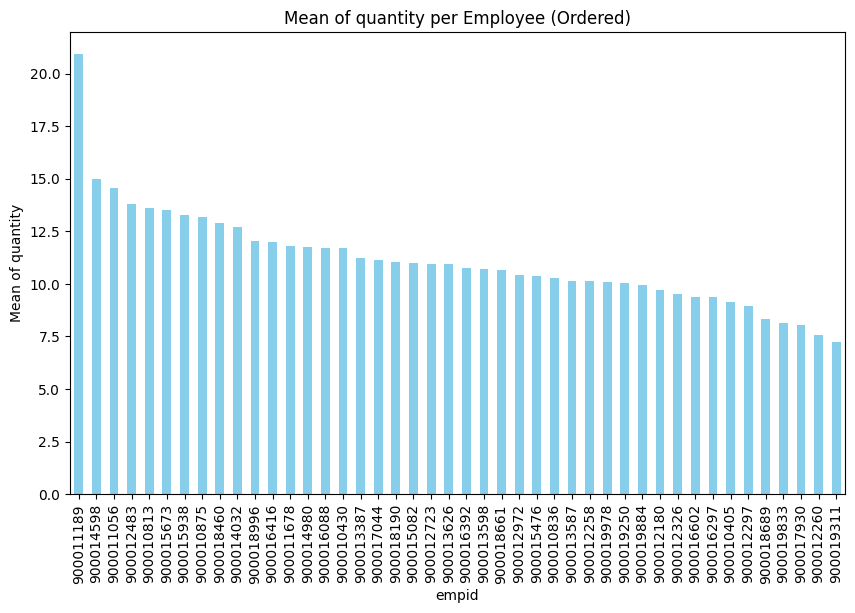

In [5]:
sorted_mean_sales_quantity = mean_sales_quantity.sort_values(ascending=False)

sorted_mean_sales_quantity.plot(kind='bar', figsize=(10,6), color='skyblue')

plt.xlabel('empid')
plt.ylabel('Mean of quantity')
plt.title('Mean of quantity per Employee (Ordered)')

plt.show()

In [6]:
summary_metrics_df = pd.DataFrame({
  'EmpID' : sum_sales_quantity.index,
  'Sum_Quantity': sum_sales_quantity.values,
  'Mean_Quantity': mean_sales_quantity.values,
  'Max_Quantity': max_sales_quantity.values
})

print(summary_metrics_df)

        EmpID  Sum_Quantity  Mean_Quantity  Max_Quantity
0   900010405          1473       9.149068           102
1   900010430          1508      11.689922           108
2   900010813           722      13.622642            99
3   900010836          1391      10.303704           108
4   900010875          1213      13.184783           101
5   900011056           887      14.540984           103
6   900011189          1339      20.921875           101
7   900011678          1108      11.787234           105
8   900012180           913       9.712766            95
9   900012258           628      10.129032            64
10  900012260           402       7.584906            96
11  900012297           500       8.928571            94
12  900012326          1298       9.544118           109
13  900012483          1437      13.817308           108
14  900012723          2497      10.951754           100
15  900012972          1800      10.404624           104
16  900013387          1642    

In [7]:
sales_asociates_df = pd.read_csv('red_30_tech_us_sales_associates.csv')

In [8]:
merged_df = summary_metrics_df.merge(sales_asociates_df, on='EmpID', how='inner')
merged_df.head()

,EmpID,Sum_Quantity,Mean_Quantity,Max_Quantity,Employee Name,Job title,Region,Start Date,End date,First_name,Last_name
0,900010405,1473,9.149068,102,Ara Dumbreck,Sales Representative,N Central East,8/27/2019,NaN,Ara,Dumbreck
1,900010430,1508,11.689922,108,Jason Bellamy,Senior Sales Representative,Central East,2/25/2003,NaN,Jason,Eisold
2,900010813,722,13.622642,99,Willow Townsend,Senior Sales Representative,Northwest,11/10/2008,NaN,Willow,Tunnick
3,900010836,1391,10.303704,108,Esmeralda Crenshaw,Sales Representative,S Central East,6/22/2002,NaN,Ezmeralda,Crenshaw
4,900010875,1213,13.184783,101,Erin Otis,Sales Associate II,Southwest,1/8/2011,NaN,Darnall,Oris


In [9]:
merged_df.isnull().sum()

EmpID             0
Sum_Quantity      0
Mean_Quantity     0
Max_Quantity      0
Employee Name     0
Job title         0
Region            0
Start Date        0
End date         40
First_name        0
Last_name         0
dtype: int64

In [10]:
summary_metrics_df['EmpID'].count()

np.int64(44)

In [11]:
merged_df["Start Date"] = pd.to_datetime(merged_df["Start Date"],
errors="coerce")
merged_df["End date" ]= pd.to_datetime(merged_df["End date"].fillna('2020-01-01'),
errors="coerce")


merged_df = merged_df.assign(EmploymentDurationDays=(merged_df["End date"] - merged_df["Start Date"]).dt.days)

merged_df.head(44)

,EmpID,Sum_Quantity,Mean_Quantity,Max_Quantity,Employee Name,Job title,Region,Start Date,End date,First_name,Last_name,EmploymentDurationDays
0,900010405,1473,9.149068,102,Ara Dumbreck,Sales Representative,N Central East,2019-08-27,2020-01-01,Ara,Dumbreck,127.0
1,900010430,1508,11.689922,108,Jason Bellamy,Senior Sales Representative,Central East,2003-02-25,2020-01-01,Jason,Eisold,6154.0
2,900010813,722,13.622642,99,Willow Townsend,Senior Sales Representative,Northwest,2008-11-10,2020-01-01,Willow,Tunnick,4069.0
3,900010836,1391,10.303704,108,Esmeralda Crenshaw,Sales Representative,S Central East,2002-06-22,2020-01-01,Ezmeralda,Crenshaw,6402.0
4,900010875,1213,13.184783,101,Erin Otis,Sales Associate II,Southwest,2011-01-08,2020-01-01,Darnall,Oris,3280.0
5,900011056,887,14.540984,103,Rodger Houlston,Sales Representative,Southwest,2005-12-29,2020-01-01,Rodrique,Houlston,5116.0
6,900011189,1339,20.921875,101,Wyatt Larose,Senior Sales Representative,Northwest,2013-06-07,2020-01-01,Wyatt,Larose,2399.0
7,900011678,1108,11.787234,105,Tracy Bellini,Sales Representative,Southeast,2006-05-06,2020-01-01,Dacie,Bellini,4988.0
8,900012180,913,9.712766,95,Bob Laird-Craig,Sales Associate I,S Central East,2015-09-08,2020-01-01,Bob,Laird-Craig,1576.0
9,900012258,628,10.129032,64,Neil Neeve,Sales Associate I,S Central West,2018-06-24,2020-01-01,Nell,Neeve,556.0


In [12]:
merged_df = merged_df.assign(SalesPerDay=merged_df['Sum_Quantity'] / merged_df['EmploymentDurationDays'].replace(0.1))

merged_df.head(44)

/tmp/ipykernel_5050/1999184424.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  merged_df = merged_df.assign(SalesPerDay=merged_df['Sum_Quantity'] / merged_df['EmploymentDurationDays'].replace(0.1))


,EmpID,Sum_Quantity,Mean_Quantity,Max_Quantity,Employee Name,Job title,Region,Start Date,End date,First_name,Last_name,EmploymentDurationDays,SalesPerDay
0,900010405,1473,9.149068,102,Ara Dumbreck,Sales Representative,N Central East,2019-08-27,2020-01-01,Ara,Dumbreck,127.0,11.598425
1,900010430,1508,11.689922,108,Jason Bellamy,Senior Sales Representative,Central East,2003-02-25,2020-01-01,Jason,Eisold,6154.0,0.245044
2,900010813,722,13.622642,99,Willow Townsend,Senior Sales Representative,Northwest,2008-11-10,2020-01-01,Willow,Tunnick,4069.0,0.177439
3,900010836,1391,10.303704,108,Esmeralda Crenshaw,Sales Representative,S Central East,2002-06-22,2020-01-01,Ezmeralda,Crenshaw,6402.0,0.217276
4,900010875,1213,13.184783,101,Erin Otis,Sales Associate II,Southwest,2011-01-08,2020-01-01,Darnall,Oris,3280.0,0.369817
5,900011056,887,14.540984,103,Rodger Houlston,Sales Representative,Southwest,2005-12-29,2020-01-01,Rodrique,Houlston,5116.0,0.173378
6,900011189,1339,20.921875,101,Wyatt Larose,Senior Sales Representative,Northwest,2013-06-07,2020-01-01,Wyatt,Larose,2399.0,0.558149
7,900011678,1108,11.787234,105,Tracy Bellini,Sales Representative,Southeast,2006-05-06,2020-01-01,Dacie,Bellini,4988.0,0.222133
8,900012180,913,9.712766,95,Bob Laird-Craig,Sales Associate I,S Central East,2015-09-08,2020-01-01,Bob,Laird-Craig,1576.0,0.579315
9,900012258,628,10.129032,64,Neil Neeve,Sales Associate I,S Central West,2018-06-24,2020-01-01,Nell,Neeve,556.0,1.129496


In [13]:
merged_df.to_csv('us_sales_statistics_by_associate.csv')

In [14]:
print(merged_df.columns)

Index(['EmpID', 'Sum_Quantity', 'Mean_Quantity', 'Max_Quantity',
       'Employee Name', 'Job title', 'Region', 'Start Date', 'End date',
       'First_name', 'Last_name', 'EmploymentDurationDays', 'SalesPerDay'],
      dtype='object')
